In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
X = np.load("angelina.npy")
print(X.shape)

(35, 1, 30000)


In [25]:
img = X[0]
img.shape

(1, 30000)

In [19]:
img = img.reshape(100, 100, -1)

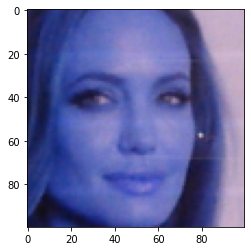

In [20]:
plt.imshow(img)

In [21]:
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


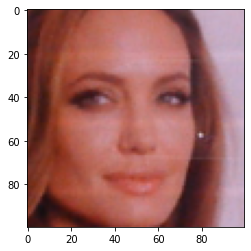

In [22]:
plt.imshow(new_img)

In [27]:
img.flatten().shape

(30000,)

## Combine the files corresponding to different person

In [2]:
import os

In [13]:
files = os.listdir("./") # returns a list of files with in the given path
X = []
for f in files:
    if f.endswith(".npy"):
        print(f)
        data = np.load(f)
        X.append(data)

print(len(X))
X_train = np.concatenate(X, axis=0)
print(X_train.shape)
np.save("X_train", X_train)

angelina.npy
Princey.npy
2
(68, 1, 30000)


In [19]:
## create Y_train
y = []
map = {} # map of class_labels : name
class_label = 0
for f in os.listdir("./")[:-1]:
    if f.endswith(".npy"):
        name = f.split(".")[0]
        print(name, class_label)
        map[class_label] = name

        shape = (len(np.load(f)), 1)
        labels = class_label*np.ones(shape)
        y.append(labels)
        class_label += 1
print(map)
print(len(y))

angelina 0
Princey 1
{0: 'angelina', 1: 'Princey'}
2


In [9]:
s = "beautiful"
s = "Princey.npy"
print(s.endswith("npy"))
if s[-3:] == "npy":
    print(s)

True
Princey.npy


In [20]:
y = np.concatenate(y, axis = 0)
print(y.shape)

(68, 1)


In [21]:
np.save("Y_train", y)

In [32]:
## Load X_train
x_ = []
x = np.load("X_train.npy")
print(x.shape)
for img in x:
    # print(img.shape)
    img = img.flatten()
    x_.append(img)
x_ = np.array(x_)
print(x_.shape)
np.save("X_train_new", x_)

(68, 1, 30000)
(68, 30000)
